<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/GOLD_decomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmm7smhdy/epx48j6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmm7smhdy/bptzlk1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73730', 'data', 'file=/tmp/tmpmm7smhdy/epx48j6_.json', 'init=/tmp/tmpmm7smhdy/bptzlk1a.json', 'output', 'file=/tmp/tmpmm7smhdy/prophet_modelyf44v7h7/prophet_model-20230925163722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


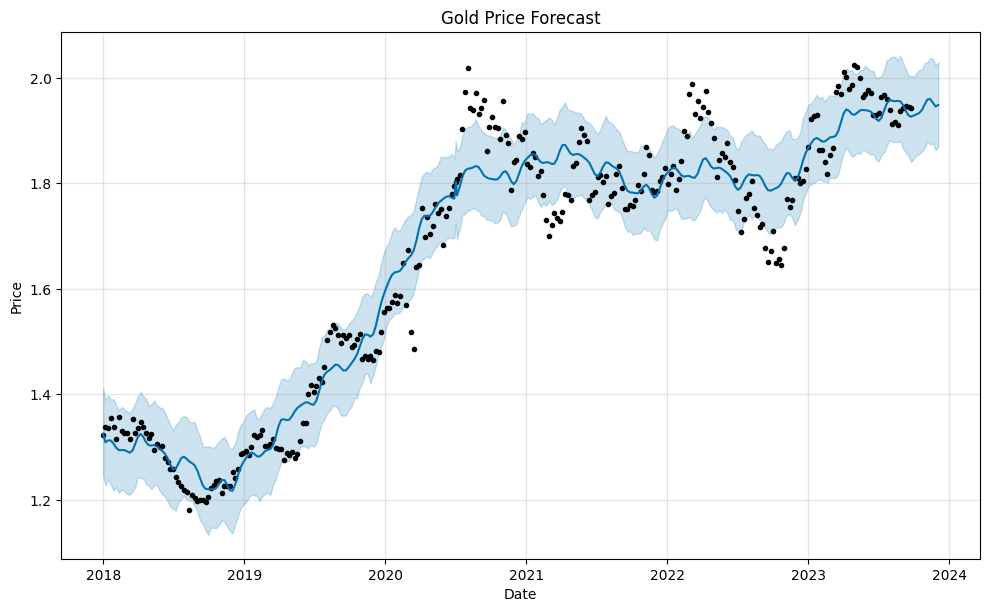

          Date  Predicted_Price
301 2023-10-01         1.928539
302 2023-10-08         1.930974
303 2023-10-15         1.933366
304 2023-10-22         1.939252
305 2023-10-29         1.949607
306 2023-11-05         1.958930
307 2023-11-12         1.960055
308 2023-11-19         1.952774
309 2023-11-26         1.945738
310 2023-12-03         1.948571


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Load and preprocess the data
data = pd.read_csv("Gold.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Step 2: Create a Prophet model
model = Prophet()

# Step 3: Fit the model to the data
model.fit(data)

# Step 4: Make future price predictions
future = model.make_future_dataframe(periods=10, freq='W')
forecast = model.predict(future)

# Step 5: Visualize the forecasted prices
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Forecast')
plt.show()

# Step 6: Print the predicted prices for the future weeks
future_predictions = forecast[['ds', 'yhat']].tail(10)
future_predictions.rename(columns={'ds': 'Date', 'yhat': 'Predicted_Price'}, inplace=True)
print(future_predictions)


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmm7smhdy/5w7anidw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmm7smhdy/0ehd9pbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20111', 'data', 'file=/tmp/tmpmm7smhdy/5w7anidw.json', 'init=/tmp/tmpmm7smhdy/0ehd9pbo.json', 'output', 'file=/tmp/tmpmm7smhdy/prophet_modelgyvpki5c/prophet_model-20230925163855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          Date  Predicted_Price
301 2023-10-01         1.929563
302 2023-10-08         1.931955
303 2023-10-15         1.934301
304 2023-10-22         1.940116
305 2023-10-29         1.950366
306 2023-11-05         1.959580
307 2023-11-12         1.960630
308 2023-11-19         1.953309
309 2023-11-26         1.946236
310 2023-12-03         1.949022


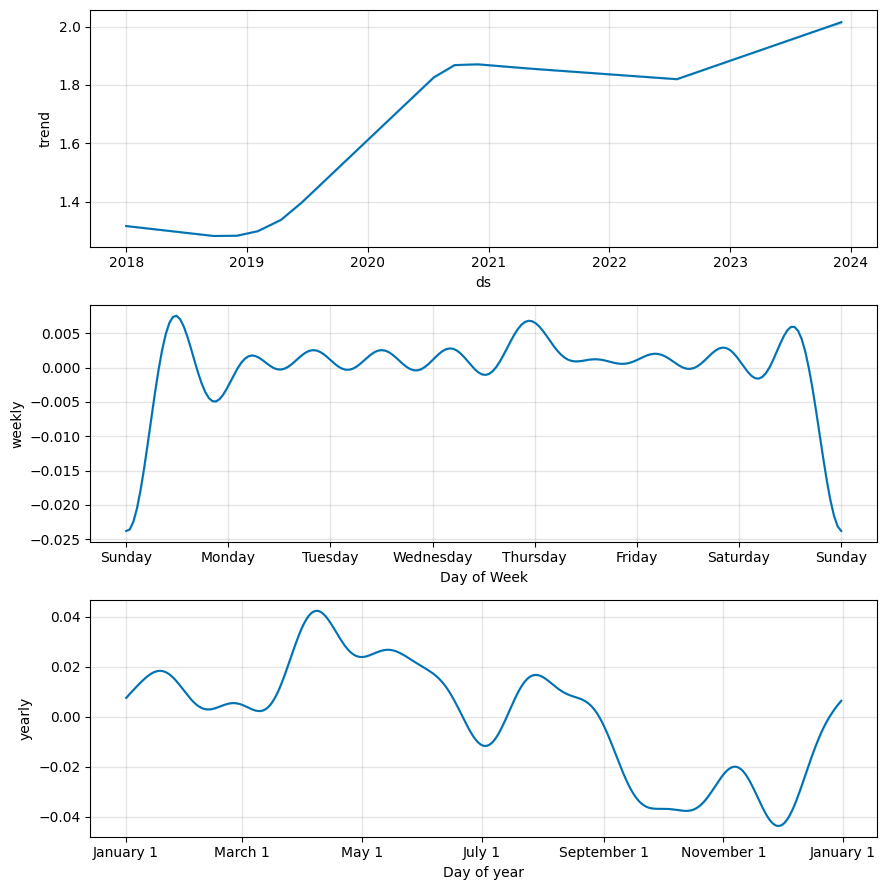

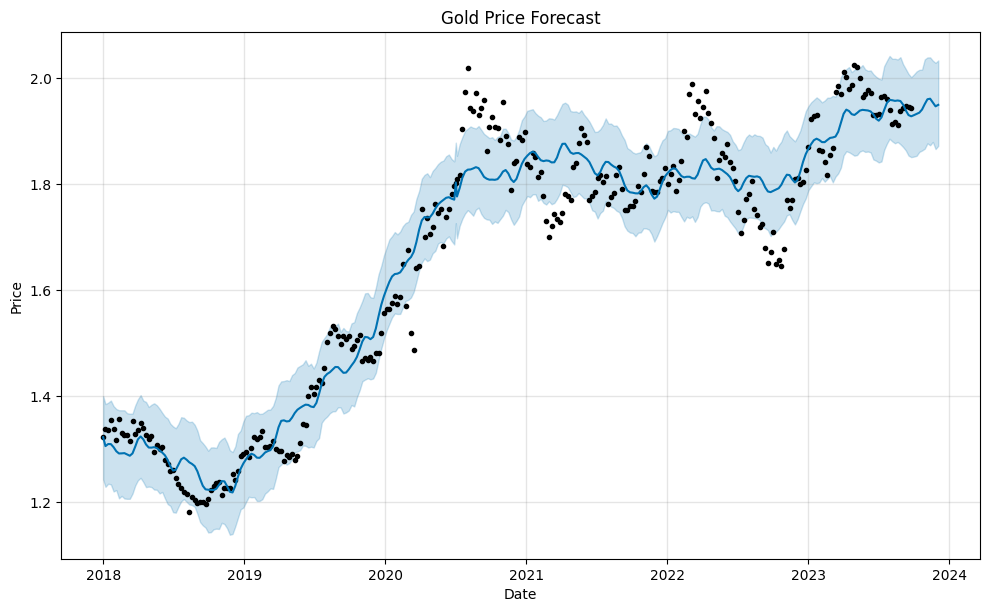

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Load and preprocess the data
data = pd.read_csv("Gold.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Step 2: Create a Prophet model with decomposition
model = Prophet()
model.add_seasonality(name='weekly', period=7, fourier_order=10)  # Assuming weekly seasonality

# Step 3: Fit the model to the data
model.fit(data)

# Step 4: Make future price predictions
future = model.make_future_dataframe(periods=10, freq='W')
forecast = model.predict(future)

# Step 5: Decompose the forecasted components
components = model.plot_components(forecast)

# Step 6: Print the predicted prices for the future weeks
future_predictions = forecast[['ds', 'yhat']].tail(10)
future_predictions.rename(columns={'ds': 'Date', 'yhat': 'Predicted_Price'}, inplace=True)
print(future_predictions)

# Step 7: Visualize the forecasted prices
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Forecast')
plt.show()
